In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("teleCust1000t.csv")

In [3]:
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB


In [5]:
df.shape

(1000, 12)

In [6]:
df.isnull().sum()

region     0
tenure     0
age        0
marital    0
address    0
income     0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [11]:
col = df.columns
col

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

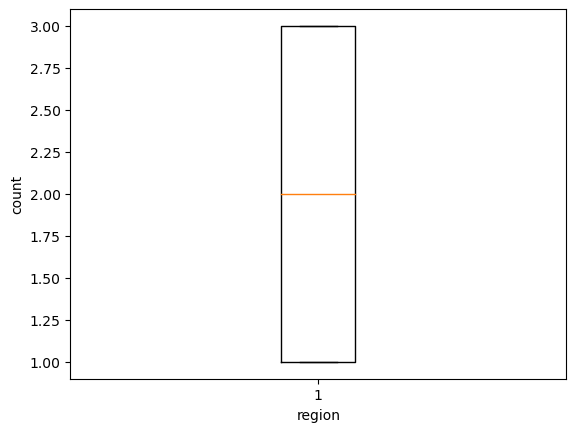

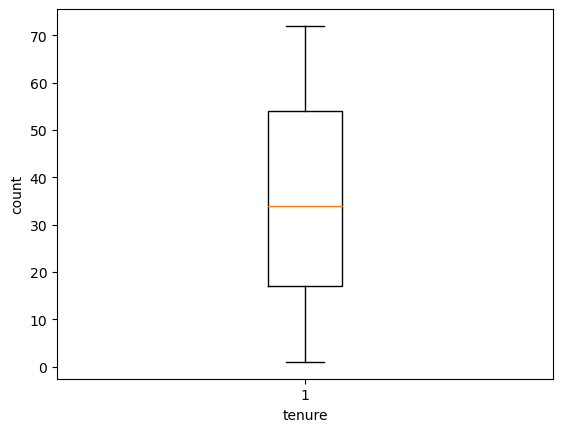

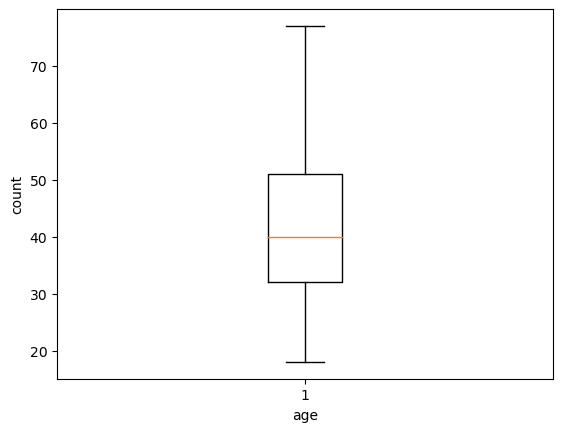

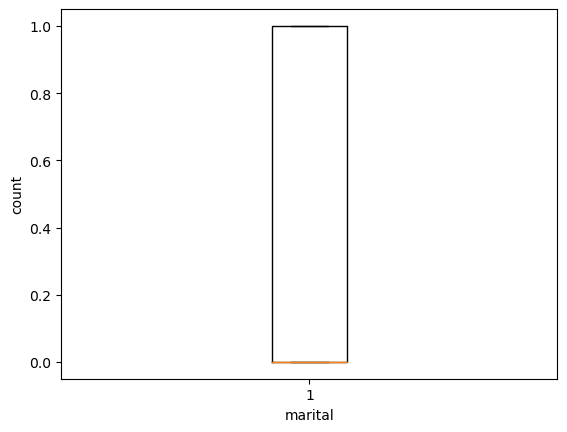

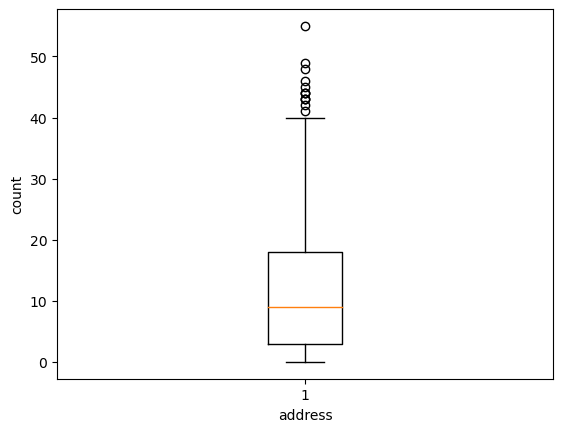

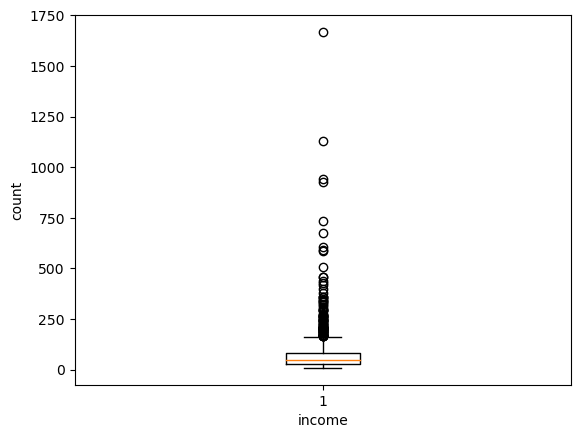

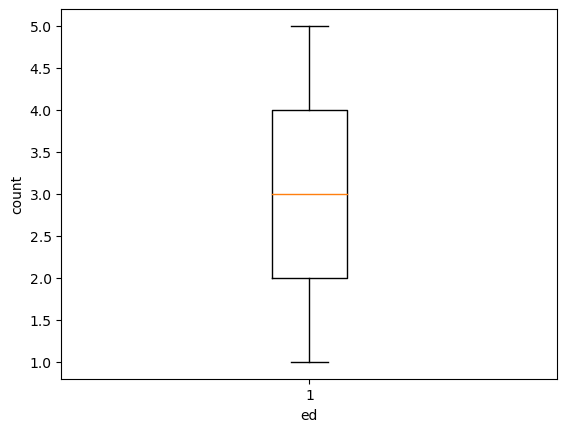

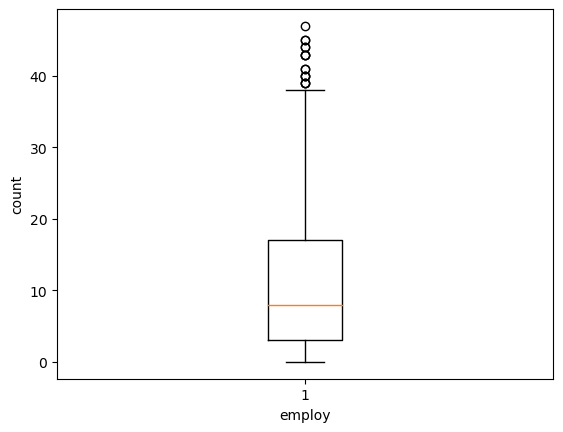

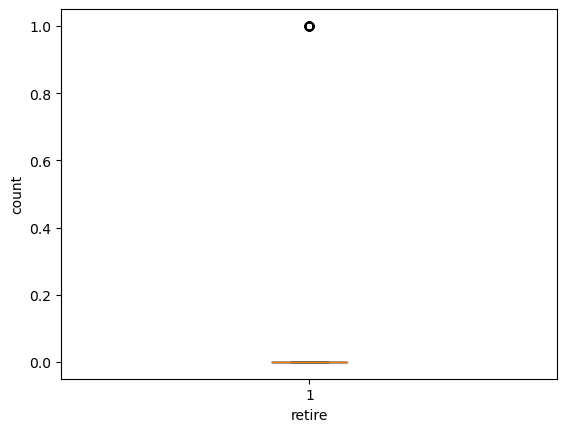

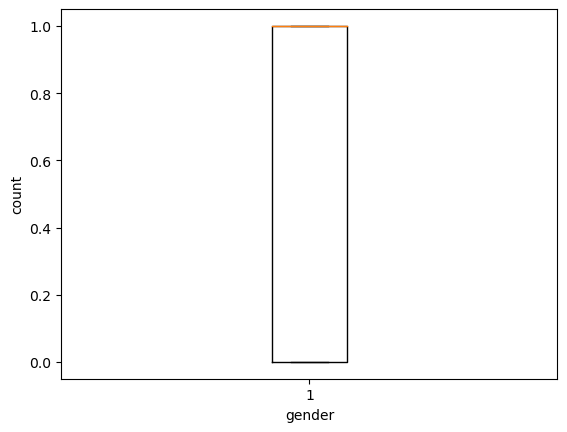

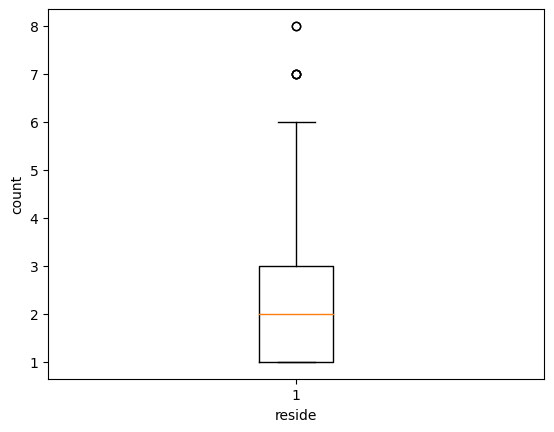

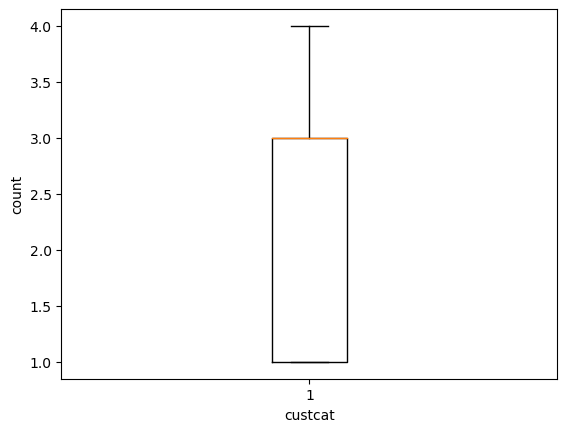

In [13]:
for i in col:
    if df[i].dtypes != object:
        plt.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [14]:
outliers_col = ['reside', 'retire', 'employ', 'income', 'address']

In [15]:
outliers_col

['reside', 'retire', 'employ', 'income', 'address']

In [17]:
for col in outliers_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5*IQR
    upper_fence = Q3 + 1.5*IQR
    df = df[(df[col]>=lower_fence) & (df[col]<=upper_fence)]

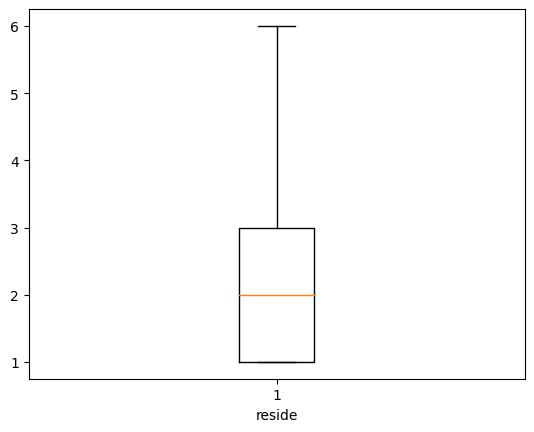

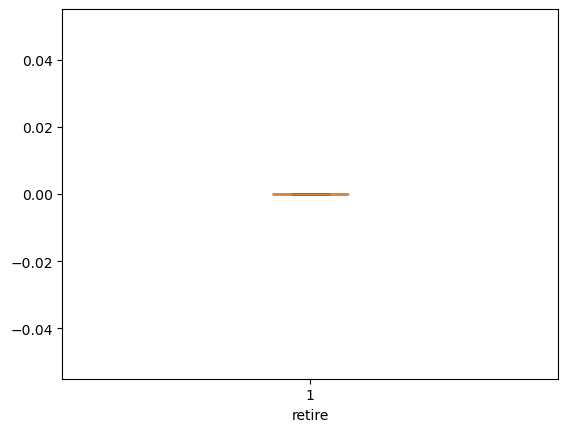

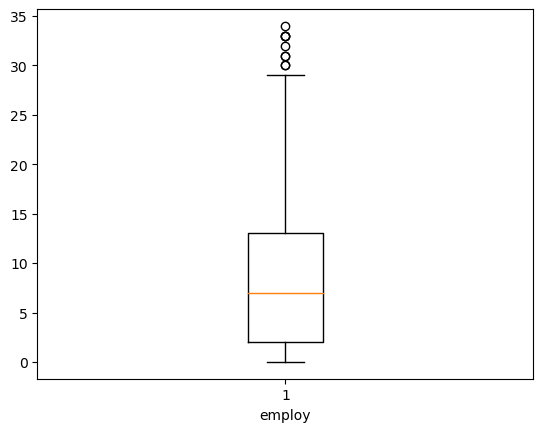

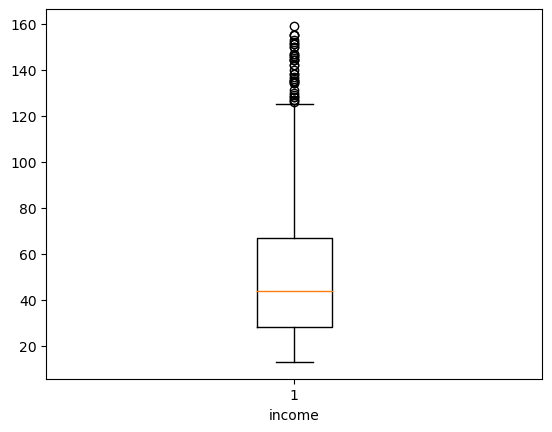

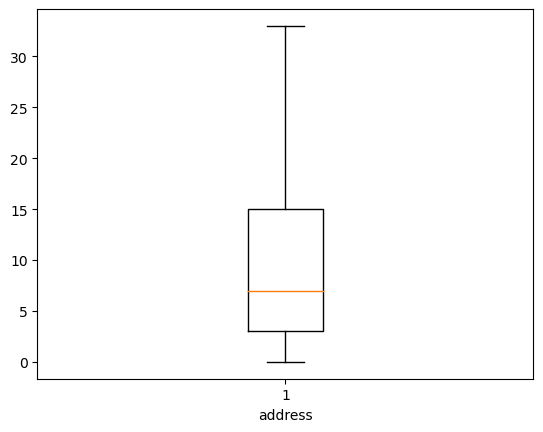

In [20]:
for j in outliers_col:
    plt.boxplot(df[j])
    plt.xlabel(j)
    plt.show()

<AxesSubplot:>

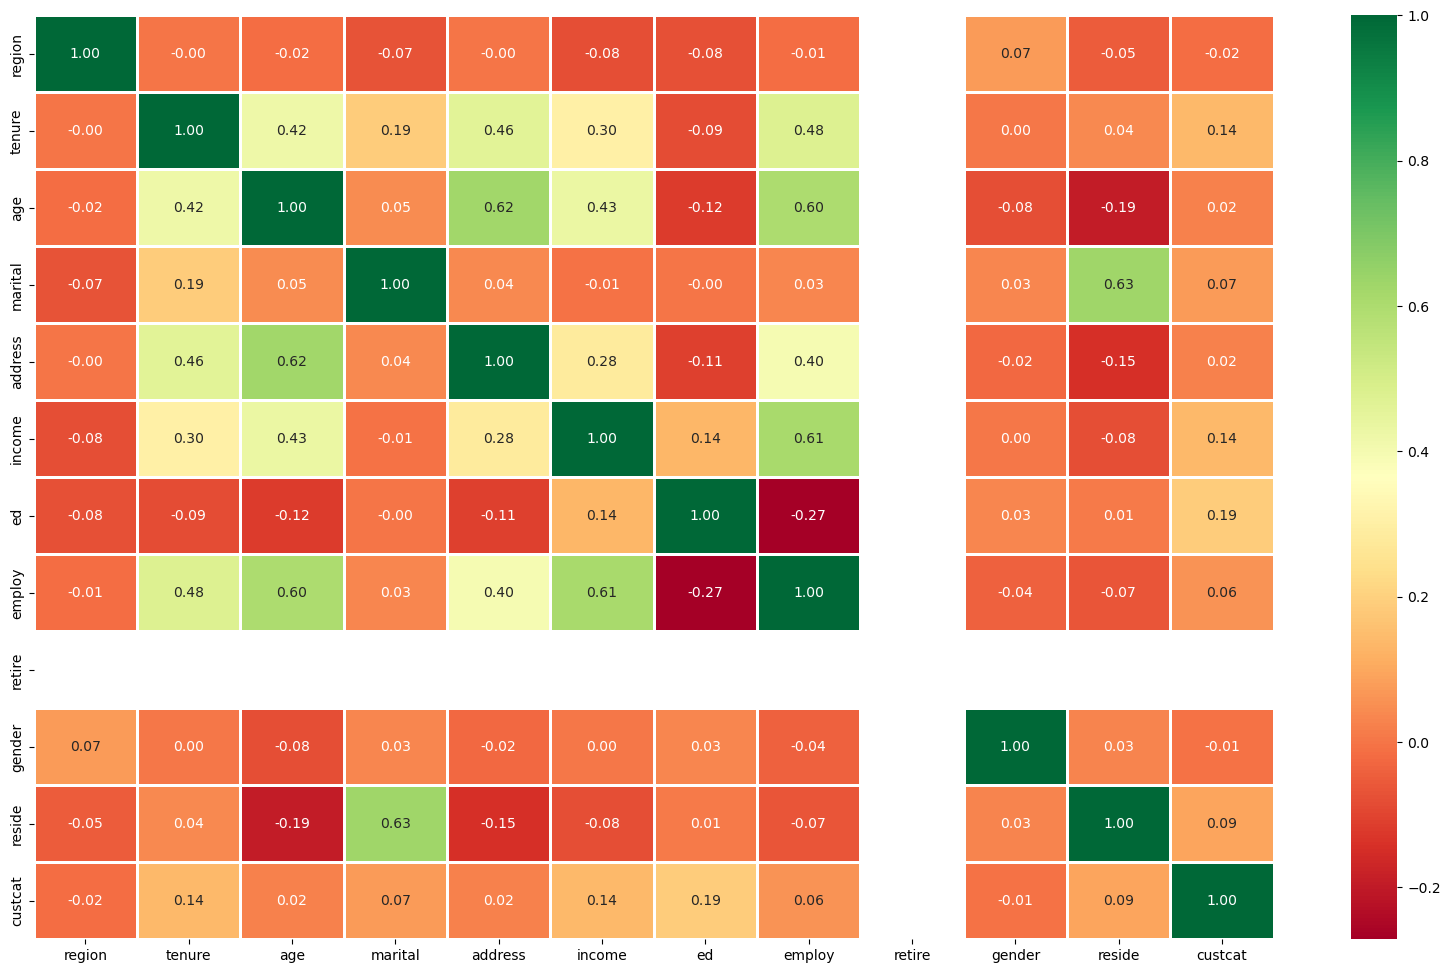

In [90]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot = True, linewidth = 1, fmt = '.2f', cmap = 'RdYlGn')

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
out = sc.fit_transform(df.drop('custcat', axis = 1))

In [35]:
df1 = pd.DataFrame(out,columns=df.columns[:-1])
df1

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,-0.010253,-0.965719,0.499581,0.992831,-0.084867,0.338594,1.065210,-0.458072,0.0,-1.009639,-0.283623
1,1.211266,-1.063814,-0.530110,0.992831,-0.329778,2.572379,1.879495,-0.458072,0.0,-1.009639,2.523988
2,1.211266,1.731895,1.248446,0.992831,1.751962,1.951883,-1.377645,2.699220,0.0,0.990453,-0.283623
3,-0.010253,0.015232,-0.530110,-1.007220,0.282499,-0.623174,-0.563360,-1.115842,0.0,0.990453,-0.985525
4,-0.010253,-0.475243,-0.810935,0.992831,-0.084867,-0.716249,-1.377645,-0.852734,0.0,-1.009639,1.120183
...,...,...,...,...,...,...,...,...,...,...,...
829,-1.231771,-0.867624,0.686797,0.992831,0.894775,0.307569,1.879495,-0.984288,0.0,-1.009639,-0.283623
830,1.211266,-1.112861,0.031539,-1.007220,-1.186965,-0.809323,0.250925,-1.115842,0.0,0.990453,0.418280
831,-1.231771,-1.260004,-0.436502,-1.007220,-0.942054,-0.964447,1.879495,-0.458072,0.0,0.990453,-0.985525
832,1.211266,1.829990,0.967622,-1.007220,1.017231,1.052164,-0.563360,1.778343,0.0,0.990453,-0.985525


In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(out,df['custcat'], test_size = 0.2, random_state = 50)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [40]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [44]:
confusion_matrix(y_test, y_pred)

array([[22,  4,  9,  6],
       [17, 10,  6,  5],
       [20, 16,  5,  5],
       [19, 16,  1,  6]], dtype=int64)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.28      0.54      0.37        41
           2       0.22      0.26      0.24        38
           3       0.24      0.11      0.15        46
           4       0.27      0.14      0.19        42

    accuracy                           0.26       167
   macro avg       0.25      0.26      0.24       167
weighted avg       0.25      0.26      0.23       167



In [52]:
accuracy_score(y_test, y_pred)

0.25748502994011974

In [53]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [54]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [56]:
confusion_matrix(y_test, y_pred)

array([[13, 13, 10,  5],
       [12,  8, 13,  5],
       [14, 13, 13,  6],
       [14, 15,  8,  5]], dtype=int64)

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.25      0.32      0.28        41
           2       0.16      0.21      0.18        38
           3       0.30      0.28      0.29        46
           4       0.24      0.12      0.16        42

    accuracy                           0.23       167
   macro avg       0.24      0.23      0.23       167
weighted avg       0.24      0.23      0.23       167



In [59]:
accuracy_score(y_test, y_pred)

0.23353293413173654

In [62]:
knn =KNeighborsClassifier(n_neighbors=10)

In [64]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [65]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [66]:
accuracy_score(y_test, y_pred)

0.3413173652694611

In [67]:
knn =KNeighborsClassifier(n_neighbors=75)

In [68]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=75)

In [69]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
accuracy_score(y_test, y_pred)

0.38323353293413176

In [71]:
knn =KNeighborsClassifier(n_neighbors=40)

In [72]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [74]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [75]:
accuracy_score(y_test, y_pred)

0.3652694610778443

In [76]:
#Choosing the K-Values
import numpy as np

In [77]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [78]:
error_rate

[0.7664670658682635,
 0.7784431137724551,
 0.7425149700598802,
 0.7245508982035929,
 0.6766467065868264,
 0.6706586826347305,
 0.6526946107784432,
 0.6586826347305389,
 0.6946107784431138,
 0.6586826347305389,
 0.6706586826347305,
 0.6526946107784432,
 0.6526946107784432,
 0.6467065868263473,
 0.6347305389221557,
 0.6646706586826348,
 0.6766467065868264,
 0.7005988023952096,
 0.6766467065868264,
 0.6706586826347305,
 0.6467065868263473,
 0.6347305389221557,
 0.6586826347305389,
 0.6467065868263473,
 0.6526946107784432,
 0.6766467065868264,
 0.6586826347305389,
 0.6826347305389222,
 0.688622754491018,
 0.6706586826347305,
 0.6586826347305389,
 0.6646706586826348,
 0.6526946107784432,
 0.6646706586826348,
 0.6706586826347305,
 0.6586826347305389,
 0.6586826347305389,
 0.6467065868263473,
 0.6526946107784432]

Text(0, 0.5, 'Error Rate')

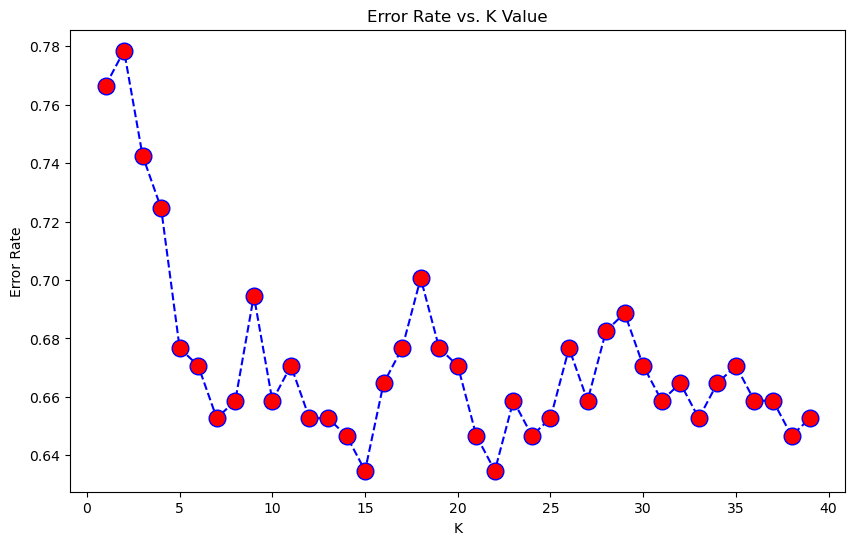

In [79]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [80]:
knn =KNeighborsClassifier(n_neighbors=9)

In [81]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [84]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [85]:
accuracy_score(y_test, y_pred)

0.30538922155688625

In [86]:
knn =KNeighborsClassifier(n_neighbors=15)

In [87]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [88]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [89]:
accuracy_score(y_test, y_pred)

0.3652694610778443

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
lr = LogisticRegression()

In [94]:
lr.fit(x_train, y_train)

LogisticRegression()

In [95]:
y_pred = lr.predict(x_test)

In [96]:
accuracy_score(y_pred, y_test)

0.40119760479041916

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = RandomForestClassifier()

In [99]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [100]:
y_pred = rf.predict(x_test)

In [101]:
accuracy_score(y_pred, y_test)

0.30538922155688625

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [105]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [106]:
y_pred= dt.predict(x_test)

In [107]:
accuracy_score(y_pred, y_test)

0.2994011976047904

In [124]:
knn =KNeighborsClassifier(n_neighbors=6)

In [125]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [126]:
y_pred = knn.predict(x_test)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [127]:
accuracy_score(y_pred, y_test)

0.32934131736526945